Horsetail matching is a method for optimizing under uncertainty. 

We are looking to minimize a quantity of interest, q, which is a function of design variables (that we can control), x, and uncertain variables (which are uncontrollable), u. Since u is uncertain, q at a given design x is also uncertain. We therefore need to define some measure of the behaviour of q under uncertainty to minimize instead. With horseail matching this measure is the difference between the bounds on the CDF (the horsetail plot) of q for a given design and targets for these bounds. 

For further details see the website: http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/ which has links to the relevant publications. 

**This tutorial illustrates how to setup and run a simple horsetail matching optimization.** 
Note that for clarification on how any of the module works, see the documentation available at: http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/documentation/

To begin with, we will only consider probabilistic uncertainties. This requires a probability distribution to be assigned to all of our uncertain parameters, and this is propagated to give a probability distribution of our quantity of interest for a given design x. Therefore the horsetail plot is the CDF itself and we are essentially doing CDF matching.

Firstly we need to import the functions and classes we will use from the horsetail matching module...

In [1]:
from horsetailmatching import UncertainParameter, UniformParameter, GaussianParameter, HorsetailMatching
from horsetailmatching.demoproblems import TP1

A horsetail matching object requires a function that takes two arguments: the value of the design variables, and the value of the uncertainties; it should return the value quantity of interest. Here we will use a test problem that comes that is part of the horsetail matching module. In reality, this function is likely to be a computationally expensive simulation, for example a 3D computational fluid dynamics simulation of a wing.

In [2]:
my_func = TP1
print TP1(x=[0, 1], u=[1, 0])

0.1


Next we must define the input uncertainties to the problem, by creating horsetail matching parameters. We can assign the parameters a distribution by using the base UncertainParameter class and defining a pdf function, or we can use the specific distribution subclasses such as UniformParameter and GaussianParameter. 

Here we create a uniformly distributed uncertainty and a gaussian uncertainty.

Then we create the HorsetailMatching object which will do the evalation of the horsetail matching metric. We can specify the target inverse CDF using the ftarget argument (by default a standard target of t(h) = 0 is used). 

In [3]:
def myPDF(u):
    if u > 1 or u < -1:
        return 0
    else:
        return 0.5

u_uniform = UncertainParameter(myPDF, lower_bound=-1, upper_bound=1)
u_gaussian = GaussianParameter(mean=0, standard_deviation=1)

def my_target(h): 
    return 0

theHM = HorsetailMatching(my_func, [u_uniform, u_gaussian], ftarget=my_target)

Now we use the evalMetric method to evaluate the horsetail matching metric at a design point:

In [4]:
print(theHM.evalMetric(x=[1,1]))

1.5954675519106958


We can use the getHorsetail() method to visualize the behaviour under uncertainty. It returns plottable lists of values for the two horsetail curves (the upper and lower bounds on the CDF) as the first two returned tuples. In this case the two bounds are coincidental and the horsetail plot is the CDF. 

We can then plot this using the matplotlib module for plotting in python. 

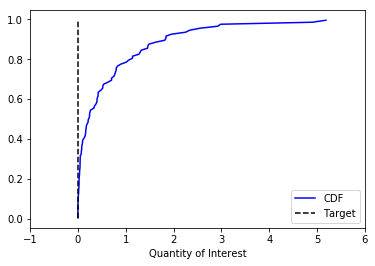

In [5]:
import matplotlib.pyplot as plt
(x1, y1, t1), (x2, y2, t2), _ = theHM.getHorsetail()
plt.plot(x1, y1, 'b', label='CDF')
plt.plot(t1, y1, 'k--', label='Target')
plt.xlim([-1, 6])
plt.xlabel('Quantity of Interest')
plt.legend(loc='lower right')
plt.show()

Now if we want to use this within an optimization, its a simple as passing theHM.evalMetric to whichever optimizer we like. For example, using the scipy optimize module's minimize function:

In [7]:
from scipy.optimize import minimize

solution = minimize(theHM.evalMetric, x0=[3,2], method='Nelder-Mead')
print(solution)

  status: 0
    nfev: 107
 success: True
     fun: 0.0
       x: array([-2.46257592,  2.46257594])
 message: 'Optimization terminated successfully.'
     nit: 54


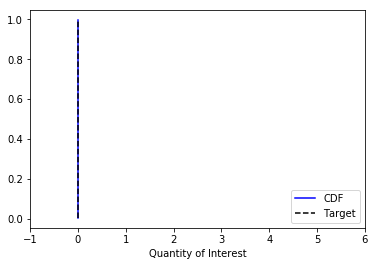

In [8]:
(x1, y1, t1), (x2, y2, t2), _ = theHM.getHorsetail()
plt.plot(x1, y1, 'b', label='CDF')
plt.plot([theHM.ftarget(y) for y in y1], y1, 'k--', label='Target')
plt.xlim([-1, 6])
plt.xlabel('Quantity of Interest')
plt.legend(loc='lower right')
plt.show()

For this simple test problem the minimum is where the CDF is a step function at 0, and so the horsetail matching metric is also 0. 

This concludes our introduction to horsetail matching. 

In the next tutorial, we do horsetail matching when not all of our uncertainties can be represented probabilistically: http://nbviewer.jupyter.org/github/lwcook/horsetail-matching/blob/master/notebooks/MixedUncertainties.ipynb

For other tutorials, please visit http://www-edc.eng.cam.ac.uk/aerotools/horsetailmatching/